In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
from tensorflow.keras.callbacks import TensorBoard
import time


In [2]:
pic=image.load_img('C:/Users/Lenovo/Desktop/Project/train/good/image.jpeg')

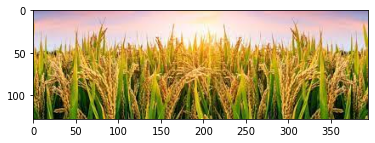

In [3]:
plt.imshow(pic)

In [4]:
cv2.imread('C:/Users/Lenovo/Desktop/Project/train/good/image.jpeg').shape

(128, 394, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)
NAME='CROPS-Prediction {}'.format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

In [6]:
train_dataset=train.flow_from_directory('C:/Users/Lenovo/Desktop/Project/train',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
valid_dataset=train.flow_from_directory('C:/Users/Lenovo/Desktop/Project/valid',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 48 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'bad': 0, 'good': 1}

In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #                       
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 ##
                                 tf.keras.layers.Flatten(),
                                 ##
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 ##
                                 tf.keras.layers.Dense(1,activation='sigmoid')                       
                                 ])

In [9]:
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [10]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=50,
                   validation_data=valid_dataset,
                   callbacks=[tensorboard])

Epoch 1/50
3/3 [==============================] - 4s 933ms/step - loss: 4.8773 - accuracy: 0.3333 - val_loss: 0.9518 - val_accuracy: 0.5385
Epoch 2/50
3/3 [==============================] - 2s 715ms/step - loss: 1.0091 - accuracy: 0.3333 - val_loss: 0.6455 - val_accuracy: 0.5385
Epoch 3/50
3/3 [==============================] - 2s 682ms/step - loss: 0.6922 - accuracy: 0.4444 - val_loss: 0.5189 - val_accuracy: 0.7692
Epoch 4/50
3/3 [==============================] - 2s 671ms/step - loss: 0.7476 - accuracy: 0.5556 - val_loss: 0.6041 - val_accuracy: 0.5385
Epoch 5/50
3/3 [==============================] - 2s 581ms/step - loss: 0.6620 - accuracy: 0.5556 - val_loss: 0.3766 - val_accuracy: 0.9231
Epoch 6/50
3/3 [==============================] - 2s 602ms/step - loss: 0.3684 - accuracy: 0.8889 - val_loss: 0.2214 - val_accuracy: 0.9231
Epoch 7/50
3/3 [==============================] - 2s 565ms/step - loss: 0.8898 - accuracy: 0.7778 - val_loss: 0.4940 - val_accuracy: 0.6154
Epoch 8/50
3/3 [====

1/1 [==============================] - 0s 273ms/step
Good Crops


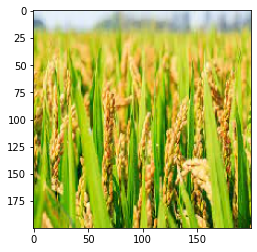

In [11]:
dir_path='C:/Users/Lenovo/Desktop/Project/extra/1.jpeg'
demo=image.load_img(dir_path,target_size=(200,200))
plt.imshow(demo)
demo=image.img_to_array(demo)
demo=tf.expand_dims(demo,axis=0)
pred=model.predict(demo)
if pred==0:
    print('Bad Crops')
else:
    print('Good Crops')

In [18]:
accuracy=model.evaluate(train_dataset)


16/16 [==============================] - 1s 59ms/step - loss: 0.2577 - accuracy: 0.9167


In [19]:
import pickle
